<a href="https://colab.research.google.com/github/SaraKarim23/Artificial-Intelligence-LAB_CSE-3636-Spring-2025/blob/main/A_Search_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is A* Search Algorithm? <br>
A* Search algorithm is one of the best and popular technique used in path-finding and graph traversals.

## Why A* Search Algorithm? <br>
Informally speaking, A* Search algorithms, unlike other traversal techniques, it has “brains”. What it means is that it is really a smart algorithm which separates it from the other conventional algorithms.
And it is also worth mentioning that many games and web-based maps use this algorithm to find the shortest path very efficiently (approximation).

---



In [58]:
import heapq

🔹 heapq is a Python module that helps manage a priority queue. <br>

🔹 We use it to always expand the cheapest node first.

In [59]:
# Graph representation (Adjacency List with costs)
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'D': 2, 'E': 5},
    'C': {'A': 4, 'F': 3},
    'D': {'B': 2, 'E': 1, 'G': 7},
    'E': {'B': 5, 'D': 1, 'F': 2, 'G': 3},
    'F': {'C': 3, 'E': 2, 'G': 6},
    'G': {'D': 7, 'E': 3, 'F': 6}
}

🔹 This graph shows how nodes (A, B, C, …, G) are connected. <br>
🔹 Each connection has a cost (e.g., moving from A to B costs 1).

In [60]:
# Heuristic (Straight-line distance estimate)
heuristic = {
    'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 0  # Assume G is the goal
}

🔹 The heuristic estimates how far each node is from G (goal). <br>
🔹 These values don’t have to be exact; they just help A* make better choices.<br>
🔹 The goal node G has 0 because it’s already there.

## **🚀 A* Algorithm**

In [ ]:
# A* Algorithm
def astar(graph, start, goal):
    queue = [(0, start)]  # (cost, node) A priority queue to explore nodes in order of cheapest cost.
    came_from = {start: None} #Keeps track of where we came from to rebuild the path later.
    cost = {start: 0} #cost: Stores the current cost to reach each node from start.

    while queue: # Run until there are no more nodes to explore
        _, node = heapq.heappop(queue) # Get the node with the lowest cost

        if node == goal: # If we reached the goal, reconstruct the path
            path = []
            while node:
                path.append(node)
                node = came_from[node]
            return path[::-1]  # Return path from start to goal

        for neighbor, move_cost in graph[node].items(): # Check all neighbors
            new_cost = cost[node] + move_cost # Calculate cost to reach neighbor
            if neighbor not in cost or new_cost < cost[neighbor]: # If it's a better path
                cost[neighbor] = new_cost # Update cost
                priority = new_cost + heuristic[neighbor] # A* formula: f = g + h
                heapq.heappush(queue, (priority, neighbor)) # Add to queue
                came_from[neighbor] = node # Store where we came from

    return None  # No path found

🔹 A formula:* f = g + h

*   g = new_cost (actual cost from start to neighbor)
*   h = heuristic[neighbor] (estimated cost from neighbor to goal)
*   priority = f (total estimated cost)

🔹 Push the neighbor into the queue so it will be explored later.

### **🚀 Running the Algorithm**

In [ ]:
# Find the shortest path from A to G
path = astar(graph, 'A', 'G')
print("Shortest Path:", path if path else "No path found")

Shortest Path: ['A', 'B', 'D', 'E', 'G']


# Shortest Path: ['A', 'B', 'D', 'E', 'G']

🔹 Calls astar() to find the shortest path from A to G. <br>
🔹 Prints the result.

# **📌 Code to Draw the Graph**

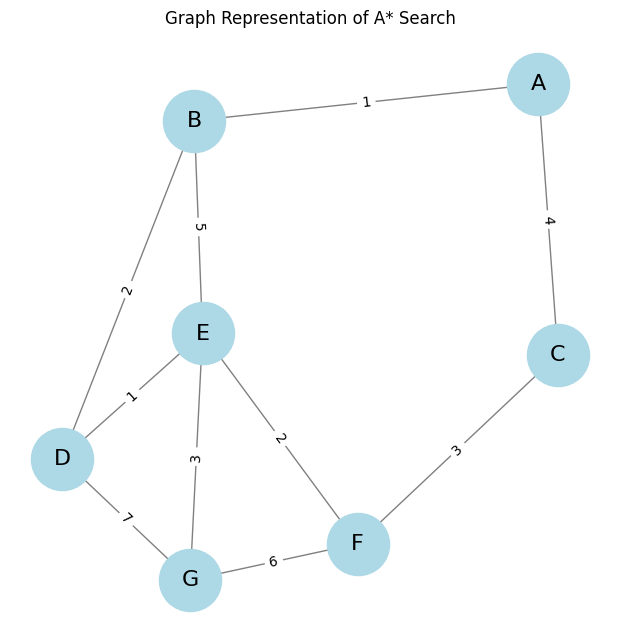

In [ ]:
import networkx as nx #Used to create and manipulate graphs.
import matplotlib.pyplot as plt    # Used to visualize the graph.


# Define the graph            # Creates an empty graph using nx.Graph().
G = nx.Graph()                #This object (G) will store nodes (A, B, C...) and edges (connections between them).
edges = [                           #Each edge is a tuple: (start_node, end_node, cost)
    ('A', 'B', 1), ('A', 'C', 4),   #Example: ('A', 'B', 1) means A is connected to B with a cost of 1.
    ('B', 'D', 2), ('B', 'E', 5),
    ('C', 'F', 3), ('D', 'E', 1),
    ('D', 'G', 7), ('E', 'F', 2),
    ('E', 'G', 3), ('F', 'G', 6)
]

# Add edges with weights
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2]) #Adds an edge between A and B with weight 1.

# Draw the graph
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(G)  # Layout for visualization
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=16, edge_color='gray')
labels = nx.get_edge_attributes(G, 'weight') #Gets the cost of each edge.
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels) #Displays the numbers (weights) on edges.

plt.title("Graph Representation of A* Search")
plt.show()

✔ Draws the graph with custom styling

with_labels=True → Displays node names (A, B, C...). <br>
node_color='lightblue' → Colors nodes light blue. <br>
node_size=2000 → Makes nodes bigger. <br>
font_size=16 → Increases label size.
edge_color='gray' → Sets edges to gray for better contrast.
